In [5]:
# loading packages
import numpy as np
import pandas as pd
import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123
from sklearn.model_selection import GridSearchCV

# importing data ( ? = missing values)
data = pd.read_csv("Auto-Data.csv", na_values = '?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [7]:
print('In total: ',data.shape)
data.head(5)

In total:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Missing values

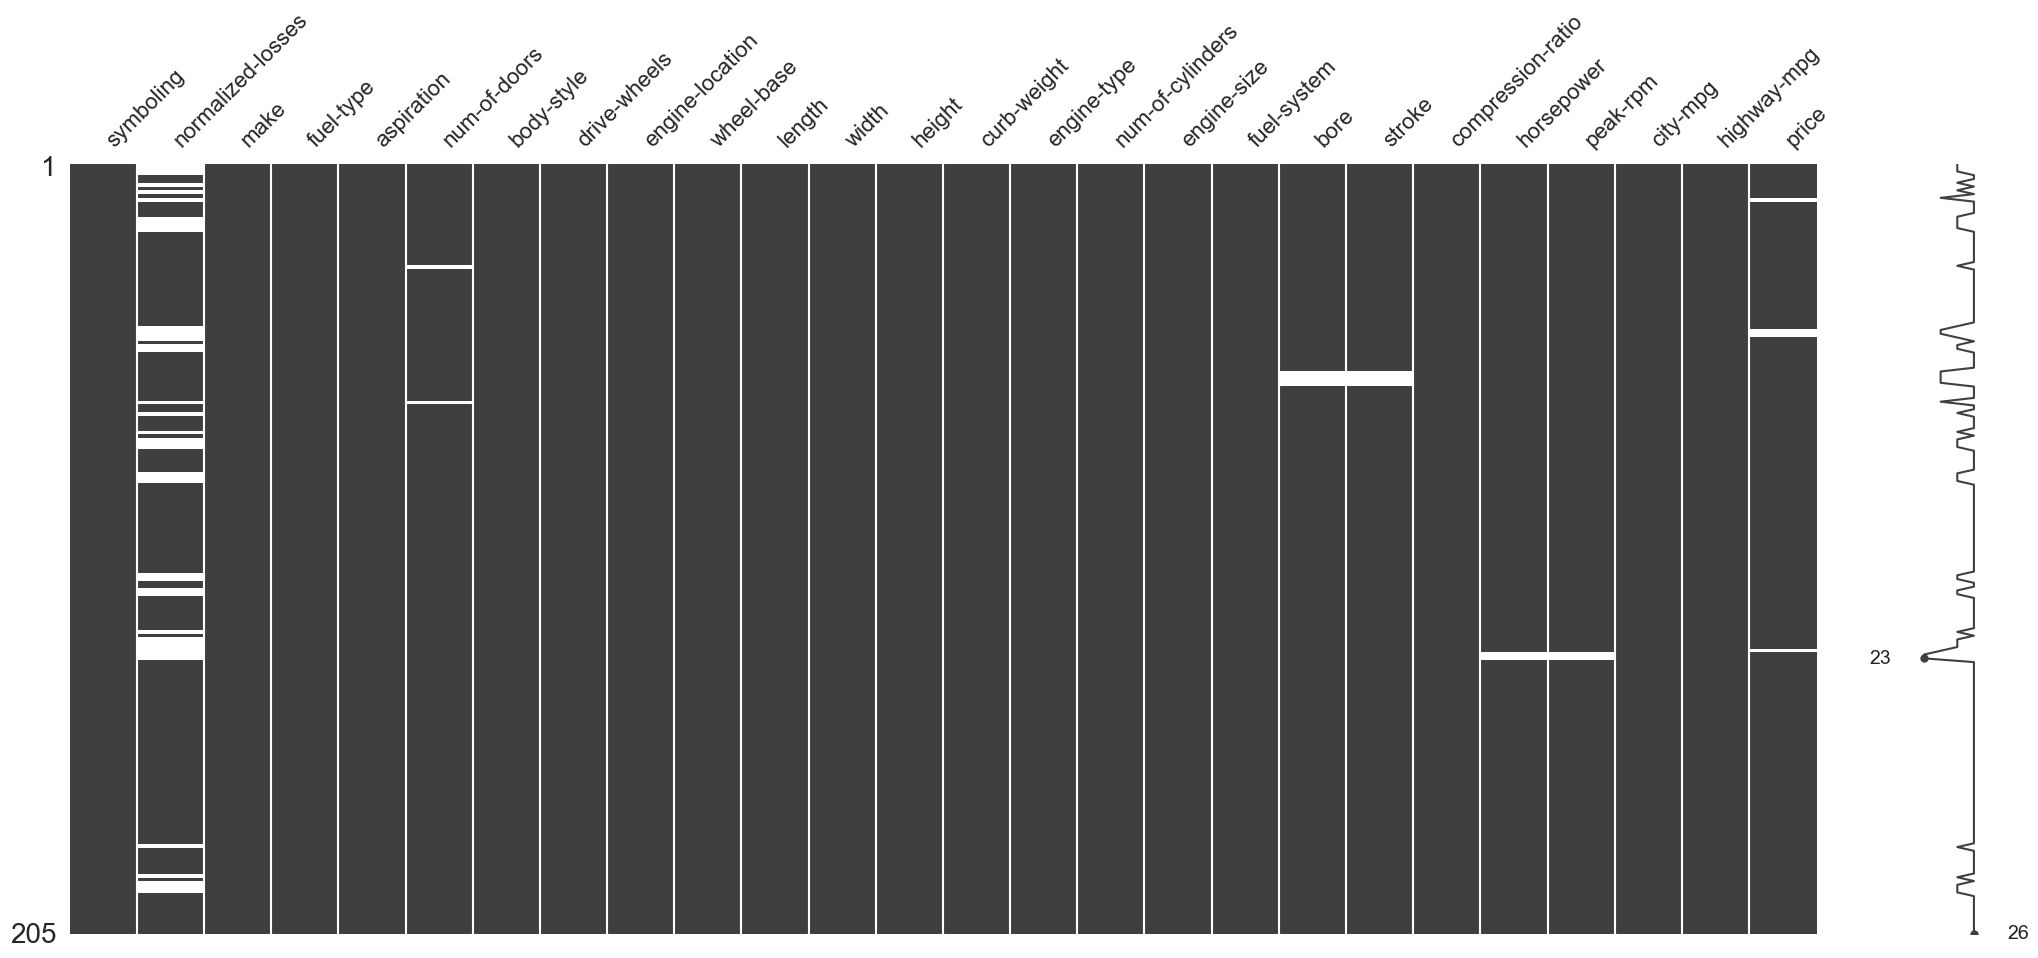

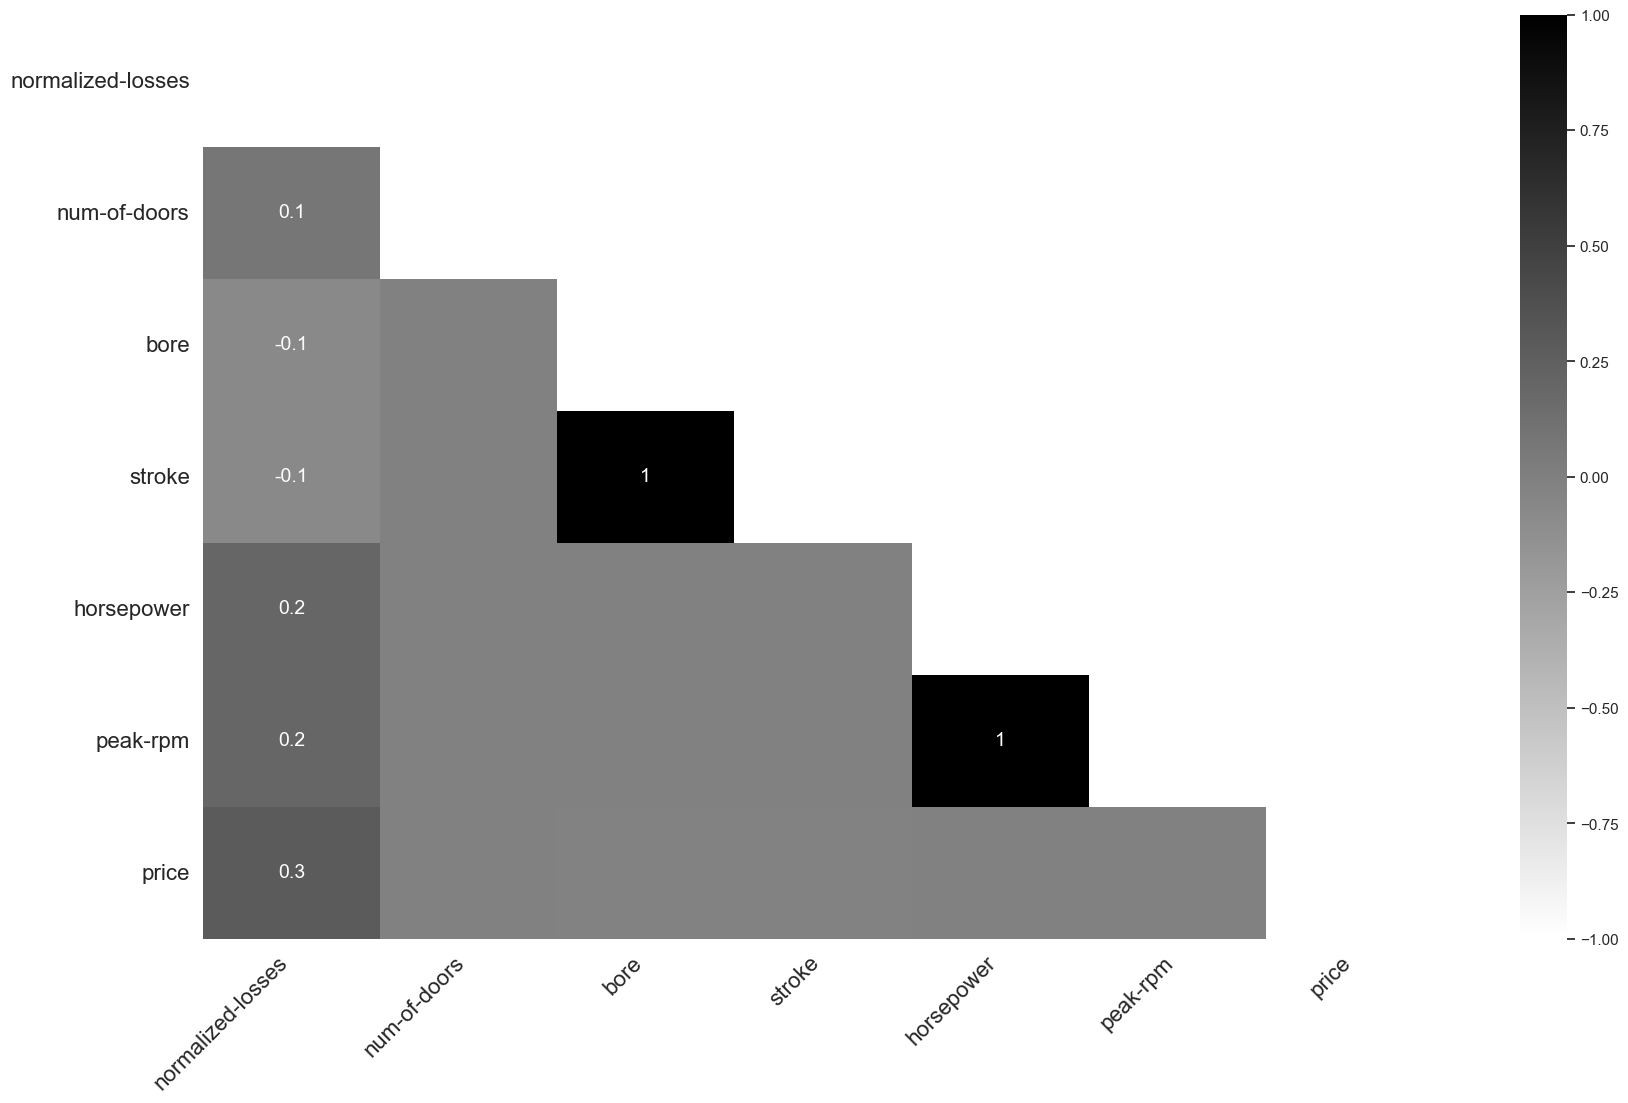

In [10]:
sns.set(style='ticks')
msno.matrix(data)
plt.show()
msno.heatmap(data,cmap='binary')
plt.show()

In [11]:
data[pd.isnull(data['normalized-losses'])].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


In [12]:
data.info

<bound method DataFrame.info of      symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible       

In [13]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

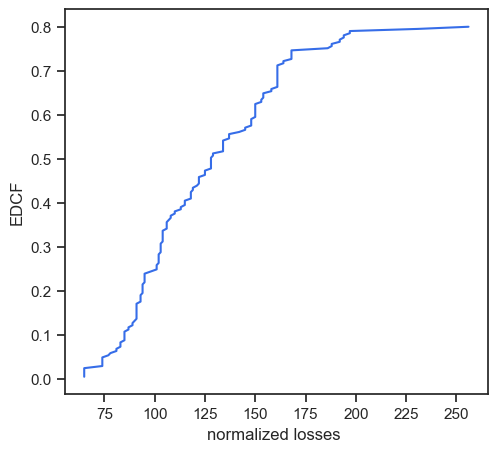

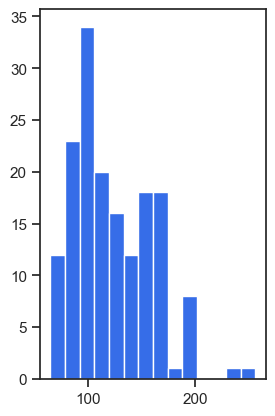

In [14]:
sns.set(style='ticks')
plt.figure(figsize=(12,5))
c='#366DE8'

plt.subplot(121)
cdf=ECDF(data['normalized-losses'])
plt.plot(cdf.x,cdf.y,label='statsmodels', color=c);
plt.xlabel('normalized losses ') ; plt.ylabel('EDCF');
plt.show()
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(),
        bins=int(np.sqrt(len(data['normalized-losses']))),
        color=c);
plt.show()

In [15]:
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [16]:
# replacing
data=data.dropna(subset=['price','stroke','peak-rpm','horsepower','num-of-doors'])
data['normalized-losses']=data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

print('In total: ',data.shape)
data.head()

In total:  (193, 26)


C:\Users\saiki\AppData\Local\Temp\ipykernel_15008\2257007379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized-losses']=data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


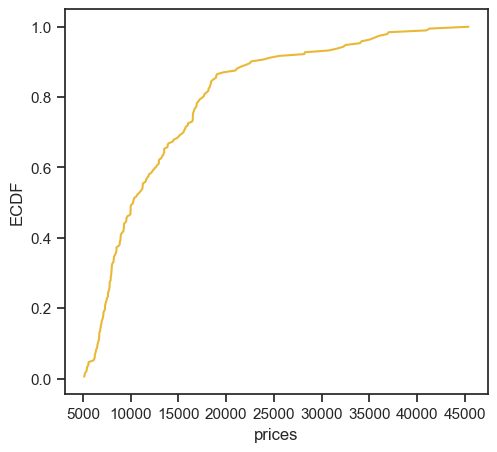

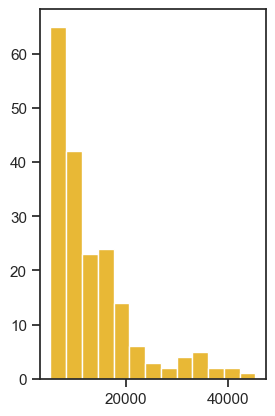

In [17]:
plt.figure(figsize=(12,5))
c2= '#E8B836'
#ECDF
plt.subplot(121)
cdf=ECDF(data['price'])
plt.plot(cdf.x,cdf.y,label='statsmodels',color=c2);
plt.xlabel('prices');
plt.ylabel('ECDF');
plt.show()
# overall distribution
plt.subplot(122)
plt.hist(data['price'],
        bins=int(np.sqrt(len(data['price']))),
        color=c2);
plt.show()

## Feature Selection and correlations

In [19]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # keep only numeric columns
    numeric_df = mydataframe.select_dtypes(include=[np.number])
    
    # find the correlations
    cormatrix = numeric_df.corr()
    
    # set the correlations on the diagonal or lower triangle to zero
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    
    # find the top n correlations 
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(
        cormatrix.abs().sort_values(ascending=False).index
    ).reset_index()
    
    # assign human friendly names
    cormatrix.columns = ['FirstVariable', 'SecondVariable', 'Correlation']
    
    return cormatrix.head(numtoreport)

# call it
mosthighlycorrelated(data, 10)


,FirstVariable,SecondVariable,Correlation
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


In [20]:
# If you previously did something like:
# data = original_data[condition]

# Do this instead:
data = data.copy()

# Now create volume and drop columns safely
data['volume'] = data['length'] * data['width'] * data['height']

data.drop(['width', 'length', 'height', 'engine-size',
           'curb-weight', 'city-mpg'], 
          axis=1, 
          inplace=True)


In [21]:
# new variables
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg',
       'price', 'volume'],
      dtype='object')

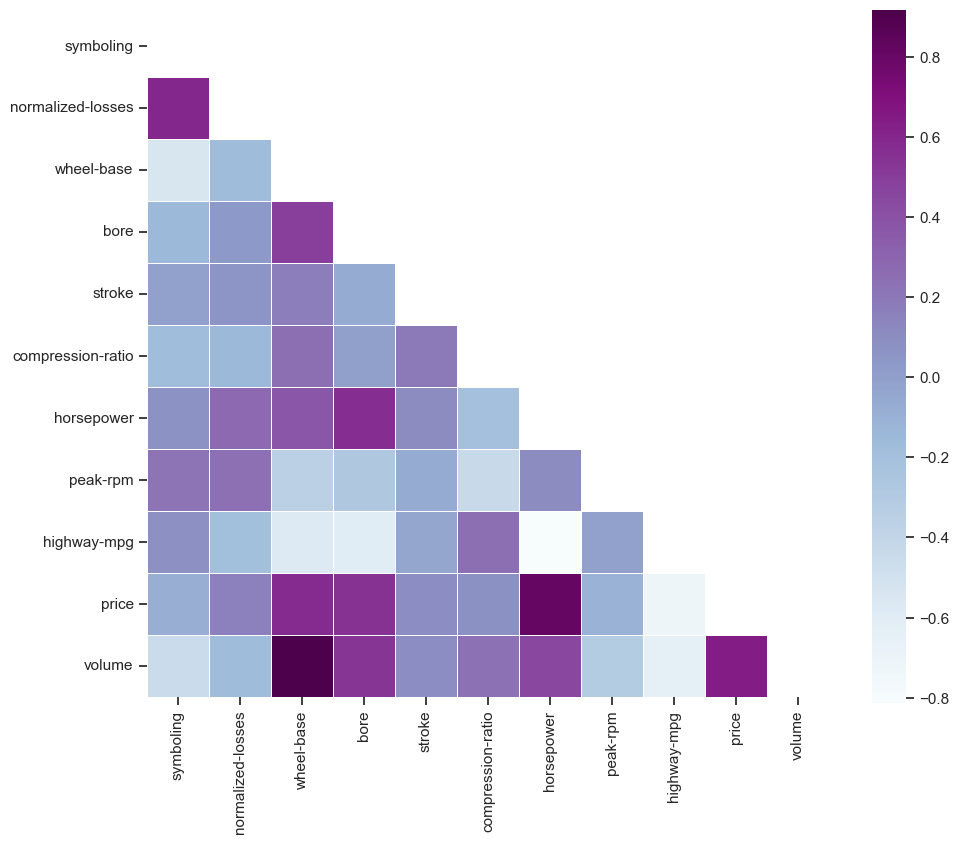

In [22]:
# keep only numeric columns
corr_all = data.select_dtypes(include=[np.number]).corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, square=True,
            linewidths=.5, ax=ax, cmap='BuPu')
plt.show()


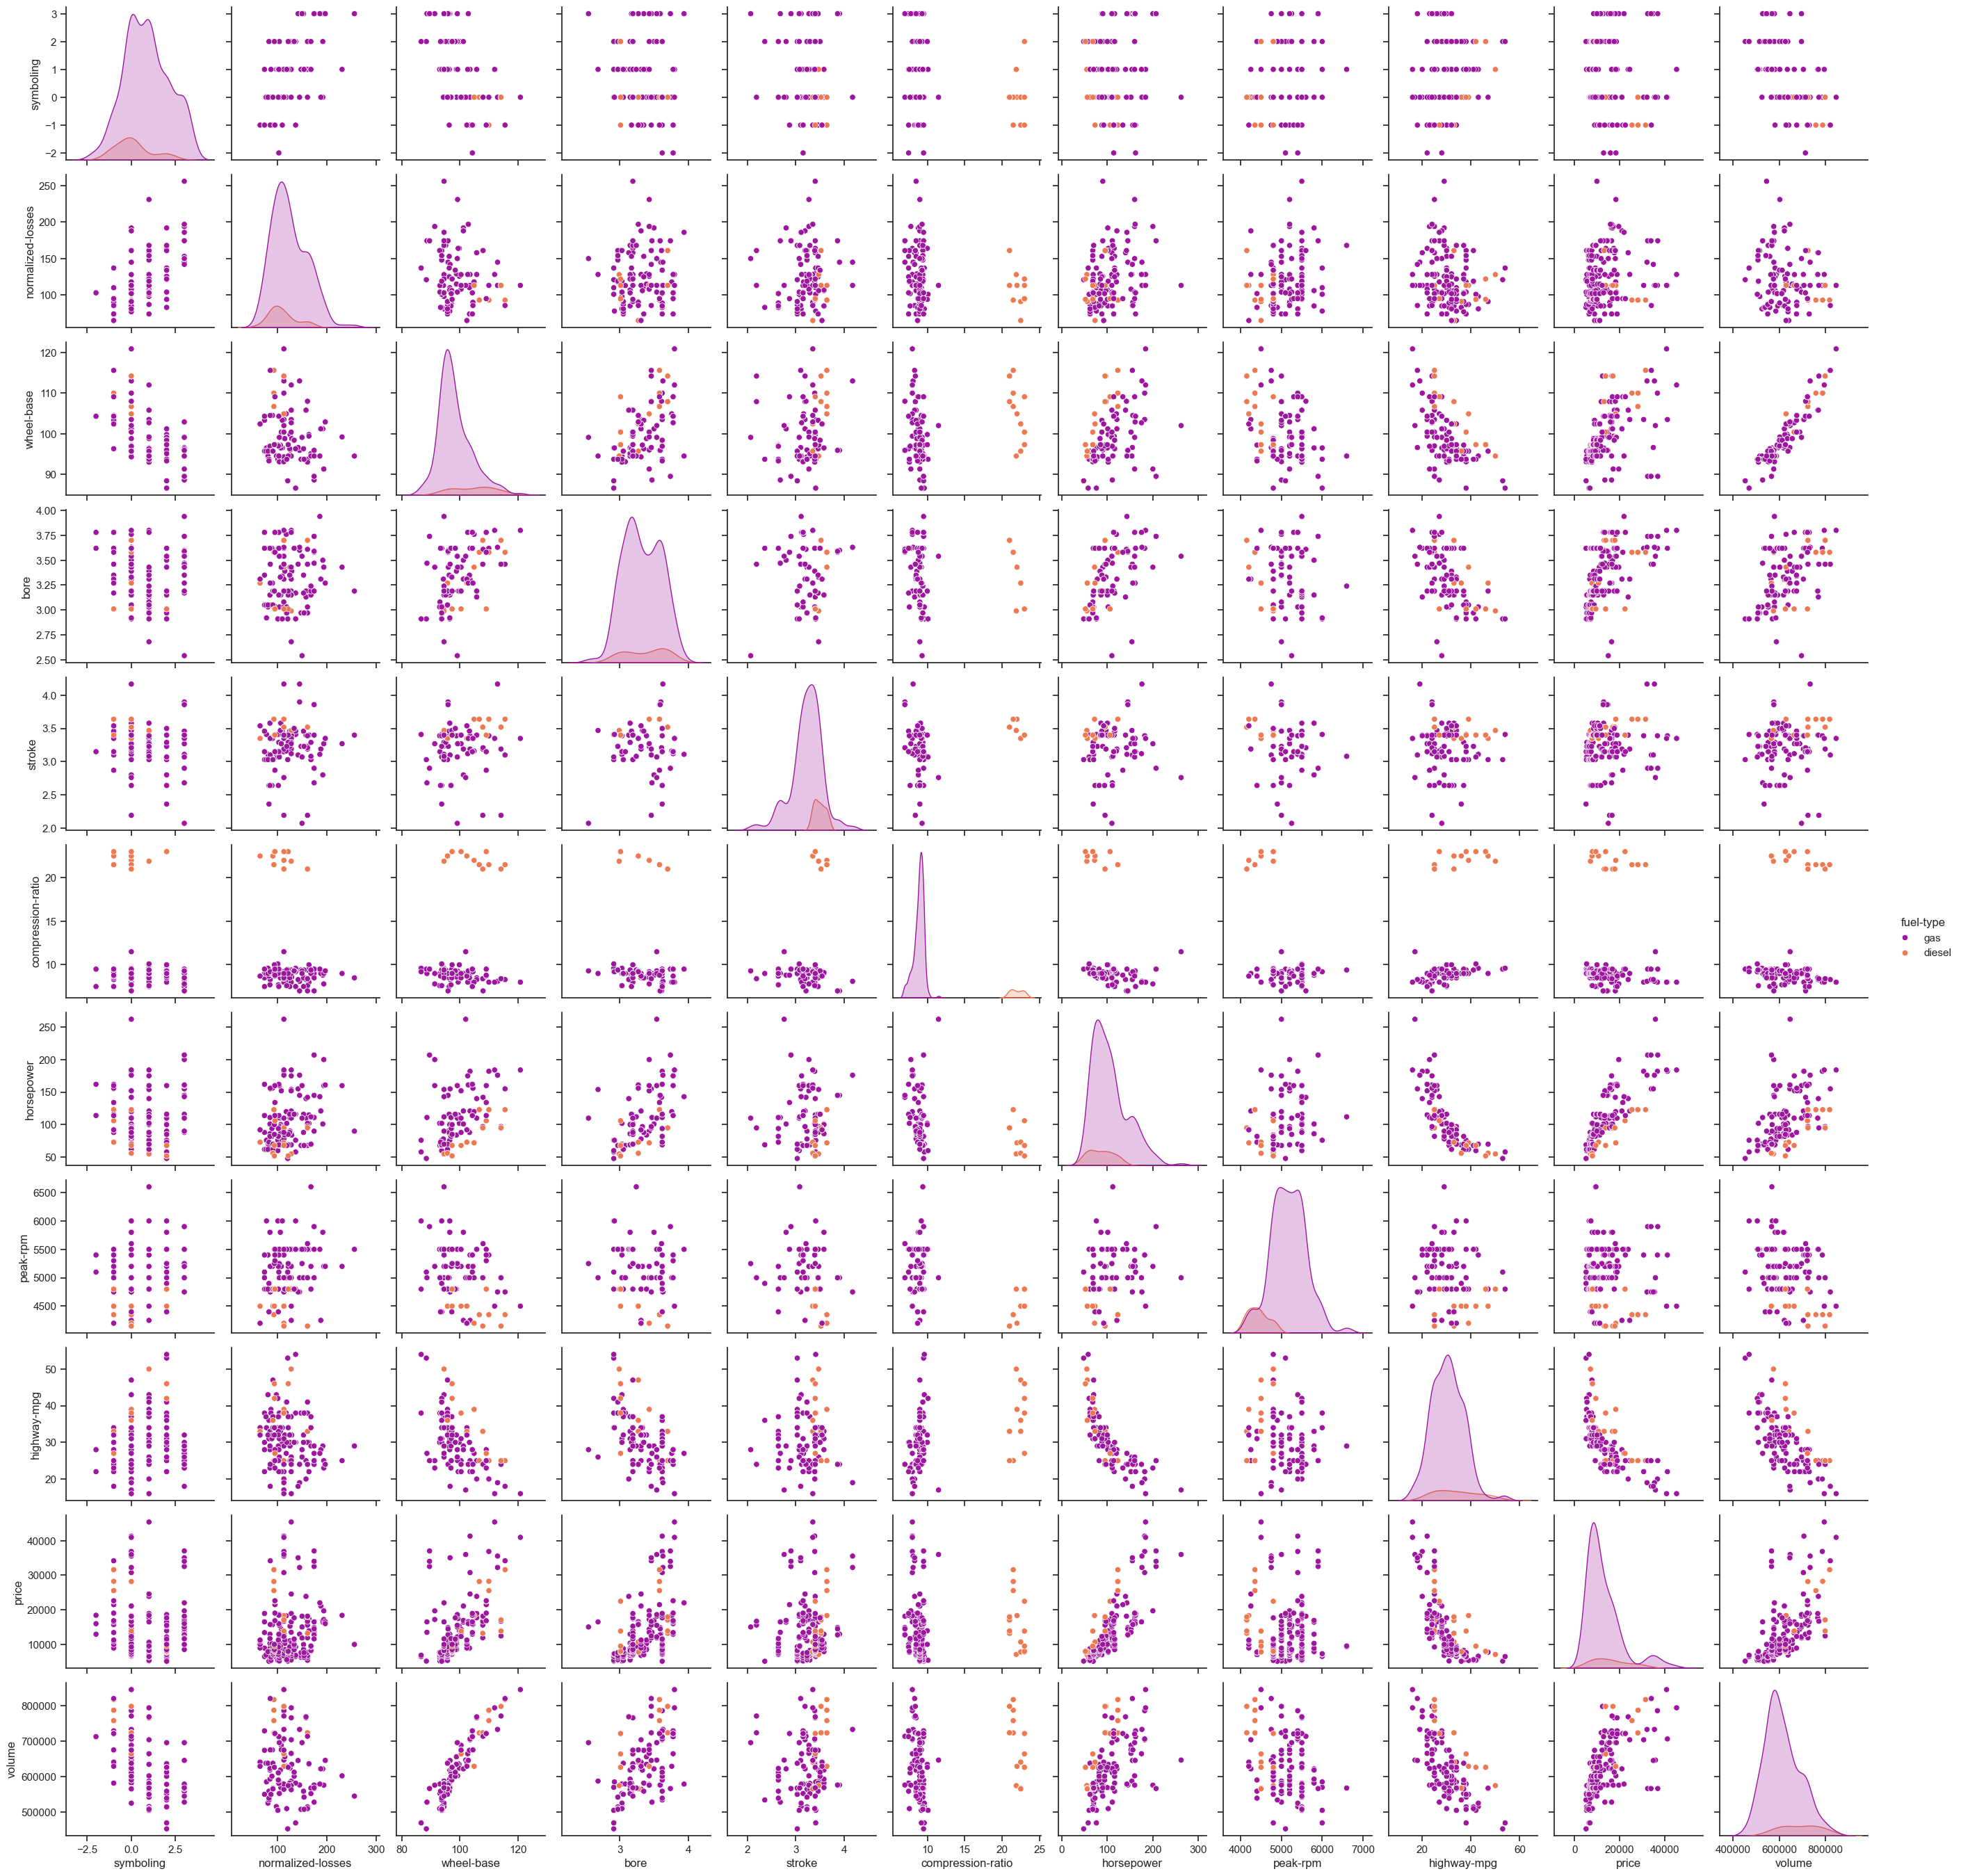

In [23]:
sns.pairplot(data,hue='fuel-type',palette='plasma')
plt.show()

In [24]:
# Make sure num-of-doors is numeric
data['num-of-doors'] = data['num-of-doors'].map({'two': 2, 'four': 4})

# lmplot with keyword arguments
sns.lmplot(
    x='price',
    y='horsepower',
    data=data,
    hue='fuel-type',
    col='fuel-type',
    row='num-of-doors',
    palette='plasma',
    fit_reg=True
)


## Preprocessing

In [26]:
# target and features
target = data.price
regressors= [x for x in data.columns if x not in ['price']]
features=data.loc[:,regressors]

num=['symboling', 'normalized-losses','volume','horsepower','wheel-base',
    'bore','stroke', 'compression-ratio', 'peak-rpm']

# scale the data
standard_scalar=StandardScaler()
features[num]= standard_scalar.fit_transform(features[num])
# glimpse
features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume
0,1.78685,1.477685,alfa-romero,gas,std,2,convertible,rwd,front,-1.682379,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
1,1.78685,1.477685,alfa-romero,gas,std,2,convertible,rwd,front,-1.682379,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
2,0.16397,0.144710,alfa-romero,gas,std,2,hatchback,rwd,front,-0.720911,ohcv,six,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041
3,0.97541,1.178276,audi,gas,std,4,sedan,fwd,front,0.142781,ohc,four,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527
4,0.97541,1.178276,audi,gas,std,4,sedan,4wd,front,0.077596,ohc,five,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551


## Feature Encoding

In [28]:
import pandas as pd

# List of categorical columns
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']

# Step 1: Create dummy variables for categorical columns
dummies = pd.get_dummies(features[classes], drop_first=True)  
# drop_first=True avoids dummy variable trap (optional)

# Step 2: Drop the original categorical columns
features = features.drop(classes, axis=1)

# Step 3: Join the dummy variables to the main DataFrame
features = features.join(dummies)

# Step 4: Check the new DataFrame
print('In total:', features.shape)
features.head()


In total: (193, 55)


,symboling,normalized-losses,wheel-base,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.78685,1.477685,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294,...,True,False,False,False,False,False,False,True,False,False
1,1.78685,1.477685,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294,...,True,False,False,False,False,False,False,True,False,False
2,0.16397,0.144710,-0.720911,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041,...,False,True,False,False,False,False,False,True,False,False
3,0.97541,1.178276,0.142781,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527,...,True,False,False,False,False,False,False,True,False,False
4,0.97541,1.178276,0.077596,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551,...,False,False,False,False,False,False,False,True,False,False


In [29]:
# splitting data into train/test sets
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=seed)
print('Train',X_train.shape,"and test",X_test.shape)

Train (135, 55) and test (58, 55)


## Lasso

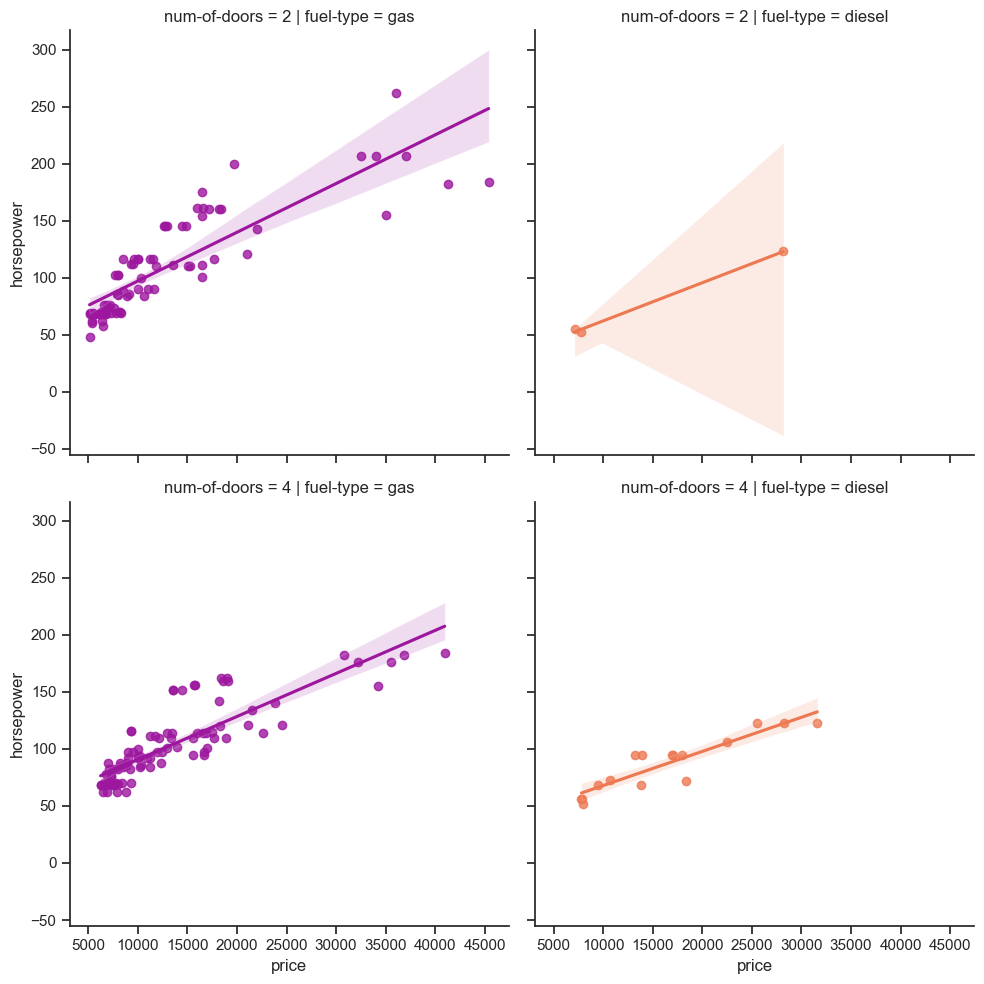

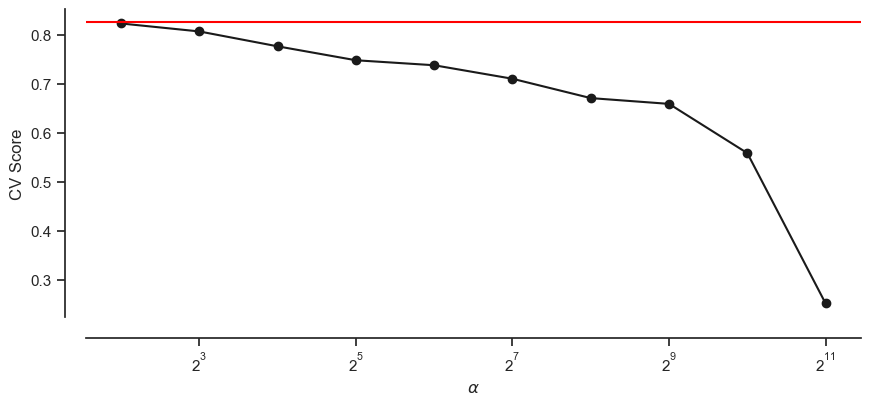

CV results: 0.8268973088230374 225.75777966854676


In [31]:

# logarithmic scale: log base 2
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state=seed)
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)

# LassoCV
lassocv = LassoCV(cv=10, random_state=seed)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

# Plot
plt.figure(figsize=(10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='red')  # 'c' was undefined, replaced with 'red'
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', base=2)  # Use 'base' instead of 'basex'
sns.despine(offset=15)

plt.show()

print('CV results:', lassocv_score, lassocv_alpha)


Lasso picked 13 features and eliminated the other 42 features.


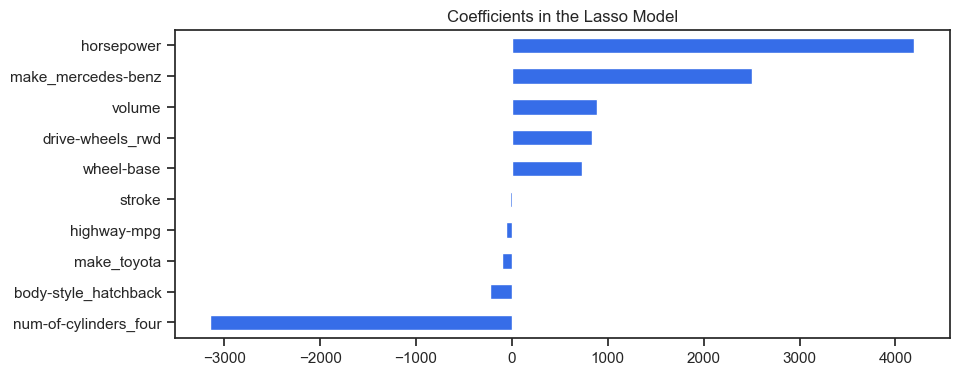

In [32]:

# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = features.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = c)
plt.title("Coefficients in the Lasso Model")
plt.show()

In [33]:

model_l1 = LassoCV(alphas = alphas, cv = 10, random_state = seed).fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test, y_test)

0.7771856609759734

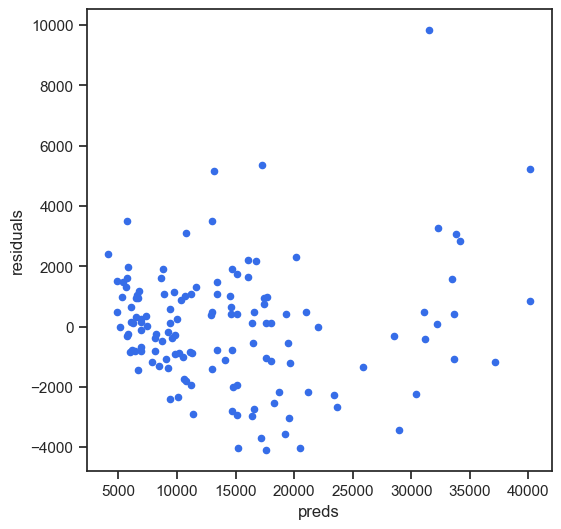

In [34]:

# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_l1.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)
plt.show()

In [35]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2

MSE(y_test, y_pred_l1); R2(y_test, y_pred_l1);

MSE: 5166450.958
R2: 0.777


In [36]:

# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()

,true,predicted
0,8499.0,9173.666041
1,17450.0,15968.413912
2,9279.0,10927.654692
3,7975.0,11552.530555
4,6692.0,6668.534923


 ## Random Forest Regressor


In [38]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state = seed)

param_grid = {'max_depth': list(range(5, 10, 1)),
              'max_features': [0.05, 0.1, 0.15, 0.2]}

grid_search = GridSearchCV(rfr, param_grid, 
                           n_jobs = -1, # no restriction on processor usage
                           cv = 5) # 5 fold cv
grid_search.fit(X_train, y_train)

print('Best combination:', grid_search.best_params_);


Best combination: {'max_depth': 9, 'max_features': 0.1}


In [39]:
# with best parameters for 1000 estimators
rfr = RandomForestRegressor(max_features = 0.1, max_depth = 9, 
                            n_estimators = 1000, random_state = seed)

score_train = cross_val_score(rfr, X_train, y_train, cv = 5).mean()
score_test = cross_val_score(rfr, X_test, y_test, cv = 5).mean()

print("Score with the train set = %.2f" % score_train)

Score with the train set = 0.86


In [40]:
model_rfr = rfr.fit(X_train, y_train)

# predictions
y_pred_rf = model_rfr.predict(X_test)

d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_rf)
    }

pd.DataFrame(d).head()

,true,predicted
0,8499.0,8932.568366
1,17450.0,17529.609510
2,9279.0,10186.034641
3,7975.0,9809.499695
4,6692.0,7316.041074


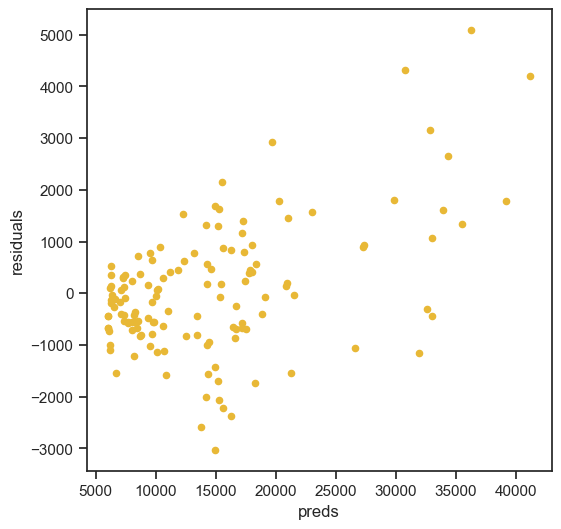

In [42]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds_rf= pd.DataFrame({"preds": model_rfr.predict(X_train), "true": y_train})
preds_rf["residuals"] = preds_rf["true"] - preds_rf["preds"]
preds_rf.plot(x = "preds", y = "residuals", kind = "scatter", color = c2)
plt.show()

In [44]:
MSE(y_test, y_pred_rf); R2(y_test, y_pred_rf);

MSE: 3732436.870
R2: 0.839


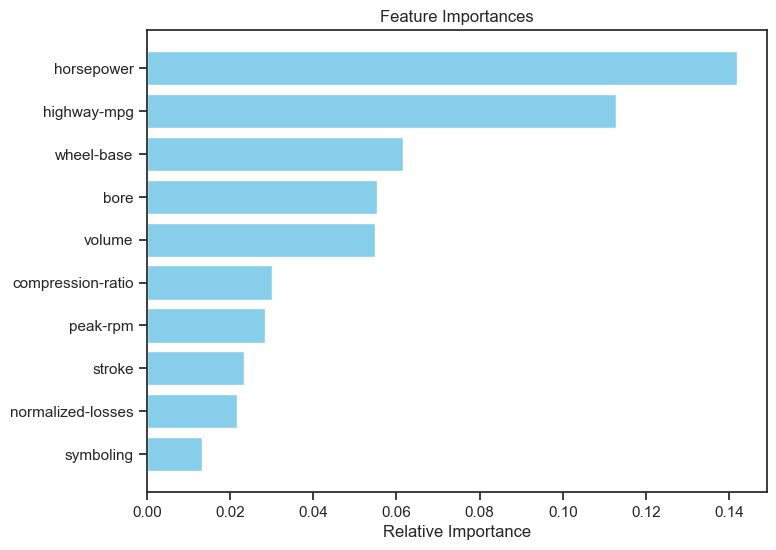

In [48]:
# Get first 10 feature importances
importances = model_rfr.feature_importances_[:10]
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')

# Use the corresponding feature names
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])

plt.xlabel('Relative Importance')
plt.show()
